<a href="https://colab.research.google.com/github/hussein0622/Digital-Marketing-Tracker/blob/main/Leads_conversion_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
import joblib

In [ ]:
df=pd.read_csv('Leads.csv')

In [ ]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
columns_to_keep = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
    'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
    'Last Activity', 'Digital Advertisement', 'Through Recommendations',
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'Last Notable Activity', 'Converted'
]

In [ ]:
df_cleaned = df[columns_to_keep]

In [ ]:
df_cleaned.to_csv("Leads_Morocco_Cleaned.csv", index=False)

In [ ]:
df2=pd.read_csv('Leads_Morocco_Cleaned.csv')

In [ ]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,No,No,No,No,No,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,Modified,1


In [ ]:
column_renames = {
    'Lead Origin': 'Traffic Entry Point',
    'Lead Source': 'Ad Source',
    'Do Not Email': 'Email Opt-Out',
    'Do Not Call': 'Phone Opt-Out',
    'TotalVisits': 'Website Visits',
    'Total Time Spent on Website': 'Time on Site (seconds)',
    'Page Views Per Visit': 'Pages per Session',
    'Last Activity': 'Last Engagement Type',
    'Digital Advertisement': 'Came from Paid Ads',
    'Through Recommendations': 'Referred by Client',
    'Receive More Updates About Our Courses': 'Subscribed to Newsletter',
    'Update me on Supply Chain Content': 'Requested Business Content',
    'Get updates on DM Content': 'Requested Marketing Content',
    'Last Notable Activity': 'Last Conversion Signal',
    'Converted': 'Converted'
}


In [ ]:
df3 = df2.rename(columns=column_renames)

# Save the updated version
df3.to_csv("Leads_Morocco_Marketing.csv", index=False)
print("Updated dataset saved as Leads_Morocco_Marketing.csv")

Updated dataset saved as Leads_Morocco_Marketing.csv


In [ ]:
df3.columns

Index(['Traffic Entry Point', 'Ad Source', 'Email Opt-Out', 'Phone Opt-Out',
       'Website Visits', 'Time on Site (seconds)', 'Pages per Session',
       'Last Engagement Type', 'Came from Paid Ads', 'Referred by Client',
       'Subscribed to Newsletter', 'Requested Business Content',
       'Requested Marketing Content', 'Last Conversion Signal', 'Converted'],
      dtype='object')

In [ ]:
df3.head()


,Traffic Entry Point,Ad Source,Email Opt-Out,Phone Opt-Out,Website Visits,Time on Site (seconds),Pages per Session,Last Engagement Type,Came from Paid Ads,Referred by Client,Subscribed to Newsletter,Requested Business Content,Requested Marketing Content,Last Conversion Signal,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,No,No,No,No,No,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,Modified,1


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic Entry Point          9240 non-null   object 
 1   Ad Source                    9204 non-null   object 
 2   Email Opt-Out                9240 non-null   object 
 3   Phone Opt-Out                9240 non-null   object 
 4   Website Visits               9103 non-null   float64
 5   Time on Site (seconds)       9240 non-null   int64  
 6   Pages per Session            9103 non-null   float64
 7   Last Engagement Type         9137 non-null   object 
 8   Came from Paid Ads           9240 non-null   object 
 9   Referred by Client           9240 non-null   object 
 10  Subscribed to Newsletter     9240 non-null   object 
 11  Requested Business Content   9240 non-null   object 
 12  Requested Marketing Content  9240 non-null   object 
 13  Last Conversion Si

In [ ]:
df3.describe()

,Website Visits,Time on Site (seconds),Pages per Session,Converted
count,9103.000000,9240.000000,9103.000000,9240.000000
mean,3.445238,487.698268,2.362820,0.385390
std,4.854853,548.021466,2.161418,0.486714
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000,0.000000
50%,3.000000,248.000000,2.000000,0.000000
75%,5.000000,936.000000,3.000000,1.000000
max,251.000000,2272.000000,55.000000,1.000000


In [ ]:
df3.isnull().sum()

,0
Traffic Entry Point,0
Ad Source,36
Email Opt-Out,0
Phone Opt-Out,0
Website Visits,137
Time on Site (seconds),0
Pages per Session,137
Last Engagement Type,103
Came from Paid Ads,0
Referred by Client,0


In [ ]:
df3_cleaned = df3.dropna()

In [ ]:
df3_cleaned.isnull().sum()

,0
Traffic Entry Point,0
Ad Source,0
Email Opt-Out,0
Phone Opt-Out,0
Website Visits,0
Time on Site (seconds),0
Pages per Session,0
Last Engagement Type,0
Came from Paid Ads,0
Referred by Client,0


In [ ]:
df3_cleaned.describe()

,Website Visits,Time on Site (seconds),Pages per Session,Converted
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151,0.378554
std,4.858802,545.256560,2.160871,0.485053
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000,0.000000
50%,3.000000,246.000000,2.000000,0.000000
75%,5.000000,922.750000,3.200000,1.000000
max,251.000000,2272.000000,55.000000,1.000000


In [ ]:
df3_cleaned.head()

,Traffic Entry Point,Ad Source,Email Opt-Out,Phone Opt-Out,Website Visits,Time on Site (seconds),Pages per Session,Last Engagement Type,Came from Paid Ads,Referred by Client,Subscribed to Newsletter,Requested Business Content,Requested Marketing Content,Last Conversion Signal,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,No,No,No,No,No,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,Modified,1


In [ ]:
df3_cleaned.columns

Index(['Traffic Entry Point', 'Ad Source', 'Email Opt-Out', 'Phone Opt-Out',
       'Website Visits', 'Time on Site (seconds)', 'Pages per Session',
       'Last Engagement Type', 'Came from Paid Ads', 'Referred by Client',
       'Subscribed to Newsletter', 'Requested Business Content',
       'Requested Marketing Content', 'Last Conversion Signal', 'Converted'],
      dtype='object')

In [ ]:
df3_cleaned.to_csv("Leads_Morocco_Marketing_cleaned.csv", index=False)

# Preprocession

In [ ]:
categorical_features = [
    'Traffic Entry Point', 'Ad Source', 'Last Engagement Type', 'Last Conversion Signal'
]

binary_features = [
    'Email Opt-Out', 'Phone Opt-Out', 'Came from Paid Ads', 'Referred by Client',
    'Subscribed to Newsletter', 'Requested Business Content', 'Requested Marketing Content'
]

numerical_features = ['Website Visits', 'Time on Site (seconds)', 'Pages per Session']

In [ ]:
X = df3_cleaned.drop(columns=['Converted'])
y = df3_cleaned['Converted']

In [ ]:
X[binary_features] = X[binary_features].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-25-3037433055.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[binary_features] = X[binary_features].replace({'Yes': 1, 'No': 0})


In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Training

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Traffic Entry Point',
                                                   'Ad Source',
                                                   'Last Engagement Type',
                                                   'Last Conversion '
                                                   'Signal'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

#Evaluate

#Logistic Regression

In [ ]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1125
           1       0.77      0.66      0.71       690

    accuracy                           0.79      1815
   macro avg       0.79      0.77      0.78      1815
weighted avg       0.79      0.79      0.79      1815



# Random Forrest

In [ ]:
from sklearn.pipeline import make_pipeline

rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("📊 Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

📊 Random Forest Performance
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1125
           1       0.71      0.65      0.68       690

    accuracy                           0.77      1815
   macro avg       0.75      0.74      0.75      1815
weighted avg       0.76      0.77      0.76      1815



# Xgboost

In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Train/test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict
y_pred_xgb = xgb_model.predict(X_test_xgb)

print("📊 XGBoost Performance")
print(classification_report(y_test_xgb, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 XGBoost Performance
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1125
           1       0.75      0.69      0.72       690

    accuracy                           0.80      1815
   macro avg       0.78      0.77      0.78      1815
weighted avg       0.79      0.80      0.79      1815



In [ ]:
joblib.dump(pipeline, "conversion_model_intern.pkl")
print("✅ Model saved as conversion_model_intern.pkl")

✅ Model saved as conversion_model_intern.pkl


/tmp/ipython-input-34-3445210924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, order=viz[col].value_counts().index, palette='Set2')
/tmp/ipython-input-34-3445210924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, order=viz[col].value_counts().index, palette='Set2')
/tmp/ipython-input-34-3445210924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, order=viz[col].value_counts().index, palette='Set2')
/tmp/ipython-input-34-3445210924.py:18: FutureWarning: 

Passing `palette

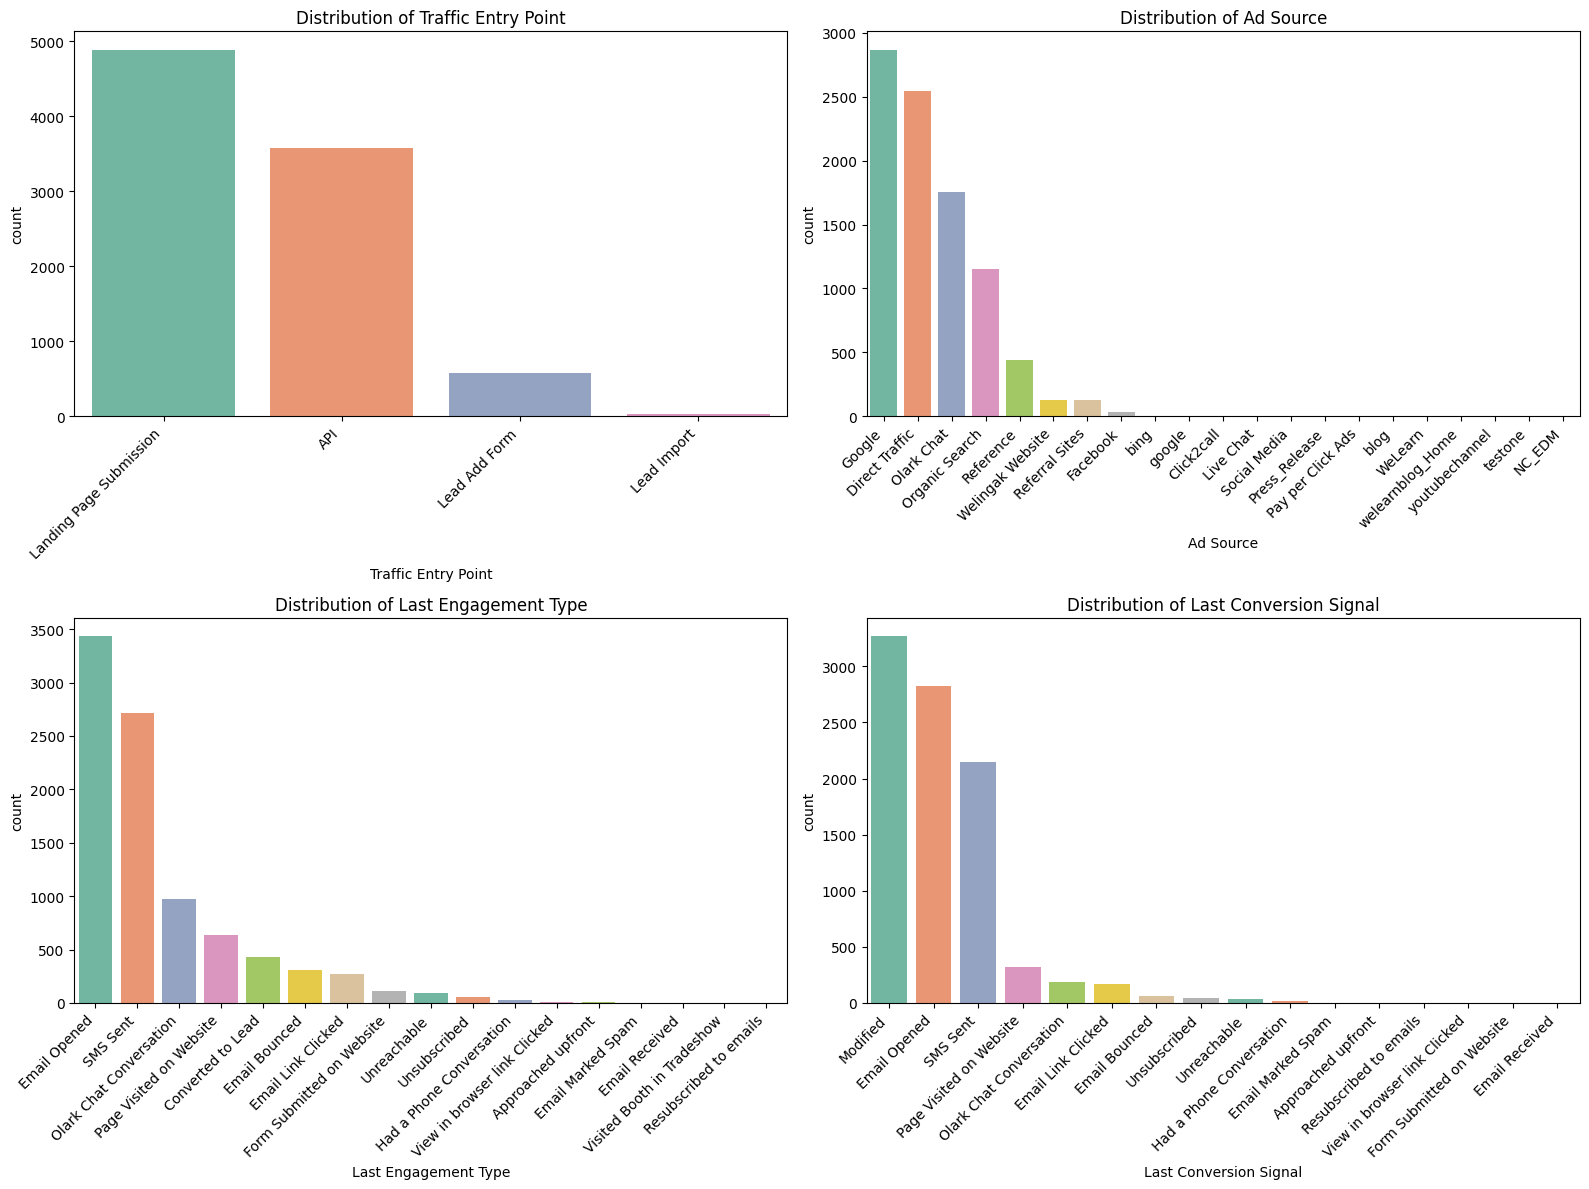

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
viz = pd.read_csv('Leads_Morocco_Marketing_cleaned.csv')  # remplacez par le nom réel de votre fichier

# Liste des variables catégorielles
categorical_features = [
    'Traffic Entry Point', 'Ad Source', 'Last Engagement Type', 'Last Conversion Signal'
]

# Définir la taille globale des graphes
plt.figure(figsize=(16, 12))

# Itérer sur chaque variable catégorielle
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=viz, x=col, order=viz[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/tmp/ipython-input-35-4157397252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, palette='pastel')
/tmp/ipython-input-35-4157397252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, palette='pastel')
/tmp/ipython-input-35-4157397252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viz, x=col, palette='pastel')
/tmp/ipython-input-35-4157397252.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

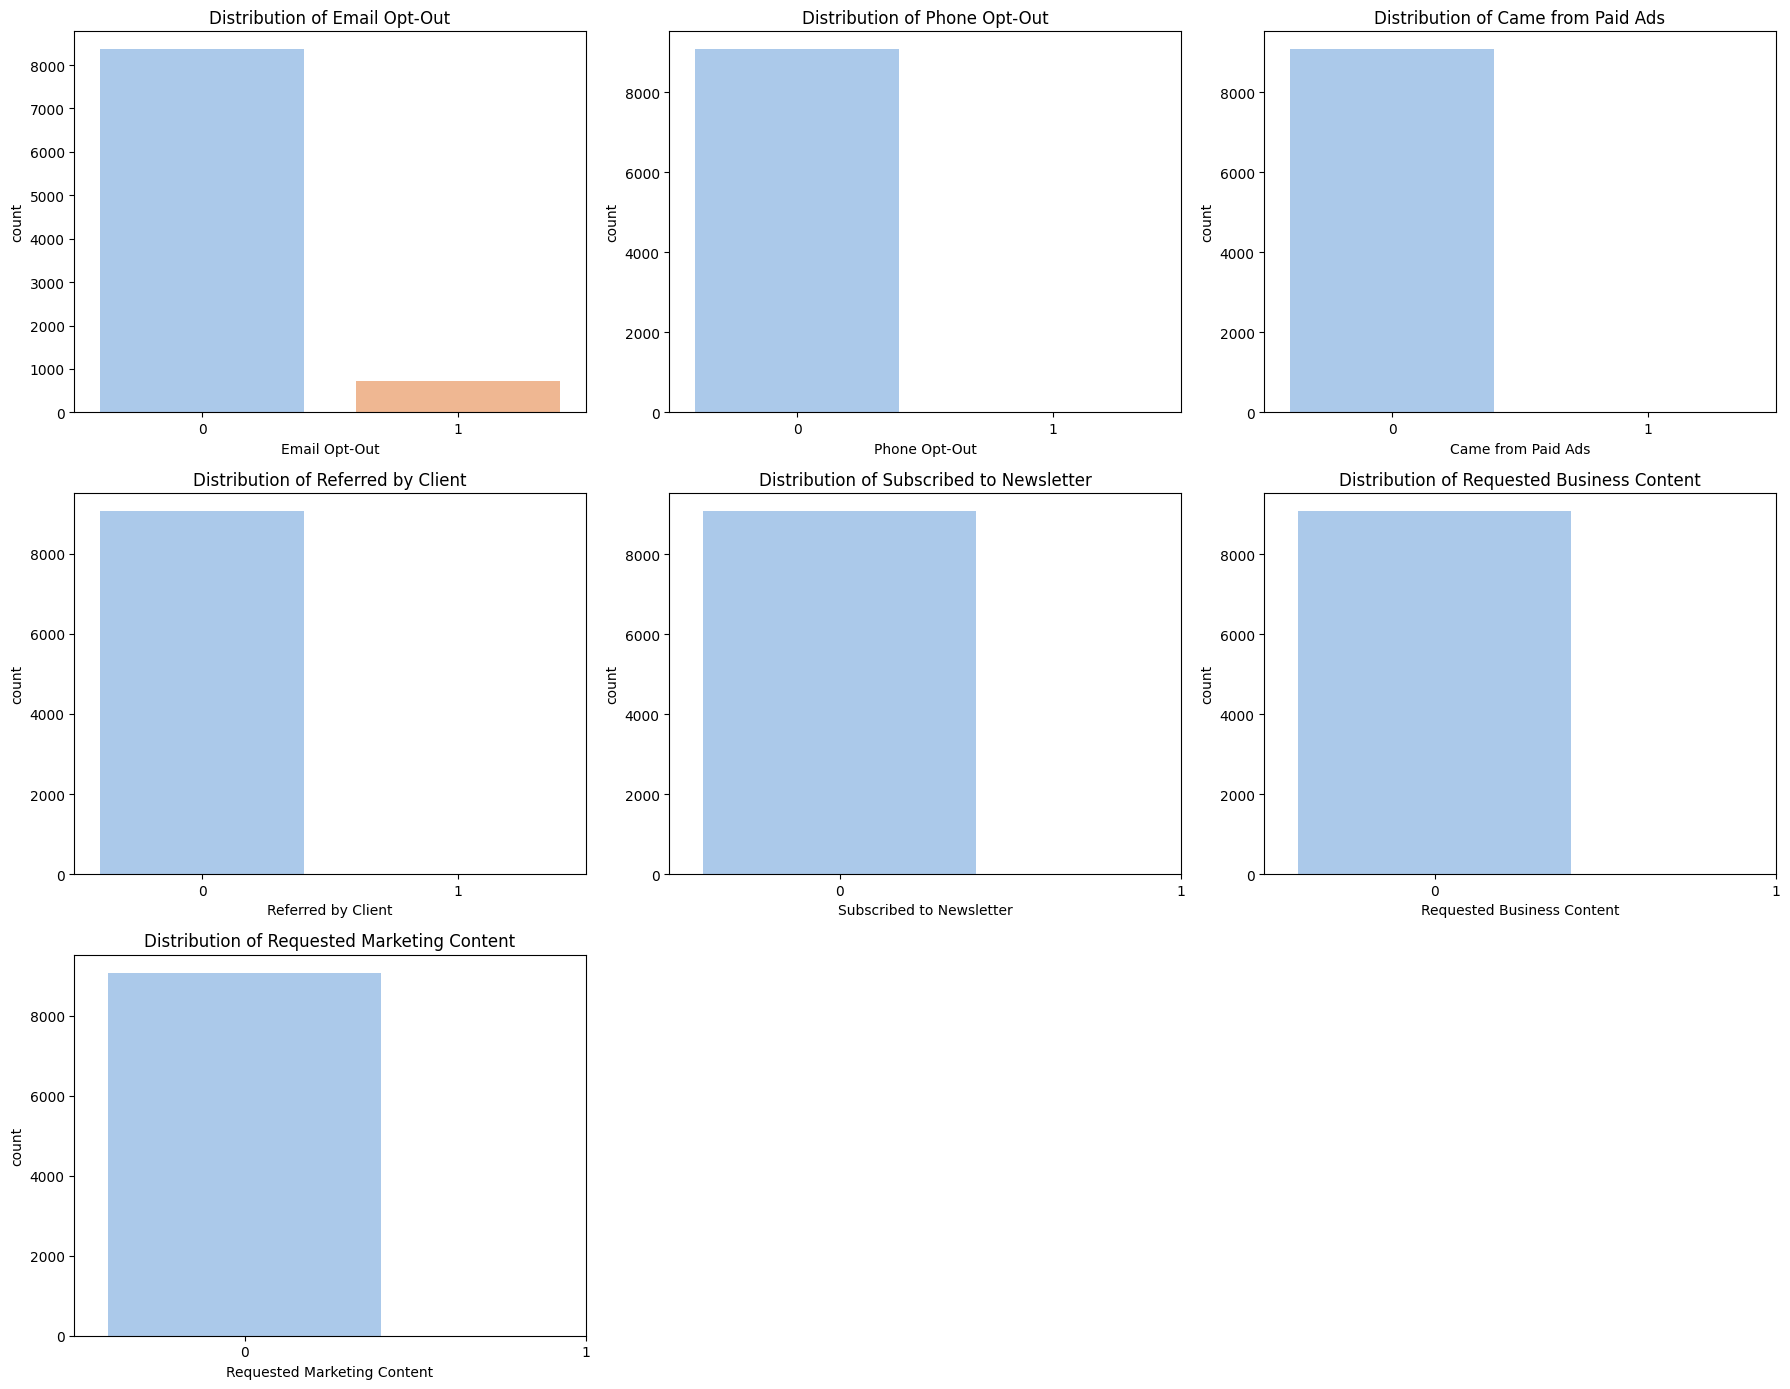

In [ ]:
binary_features = [
    'Email Opt-Out', 'Phone Opt-Out', 'Came from Paid Ads', 'Referred by Client',
    'Subscribed to Newsletter', 'Requested Business Content', 'Requested Marketing Content'
]

# Taille de la figure globale
plt.figure(figsize=(18, 14))

# Itération sur chaque variable binaire
for i, col in enumerate(binary_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=viz, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()

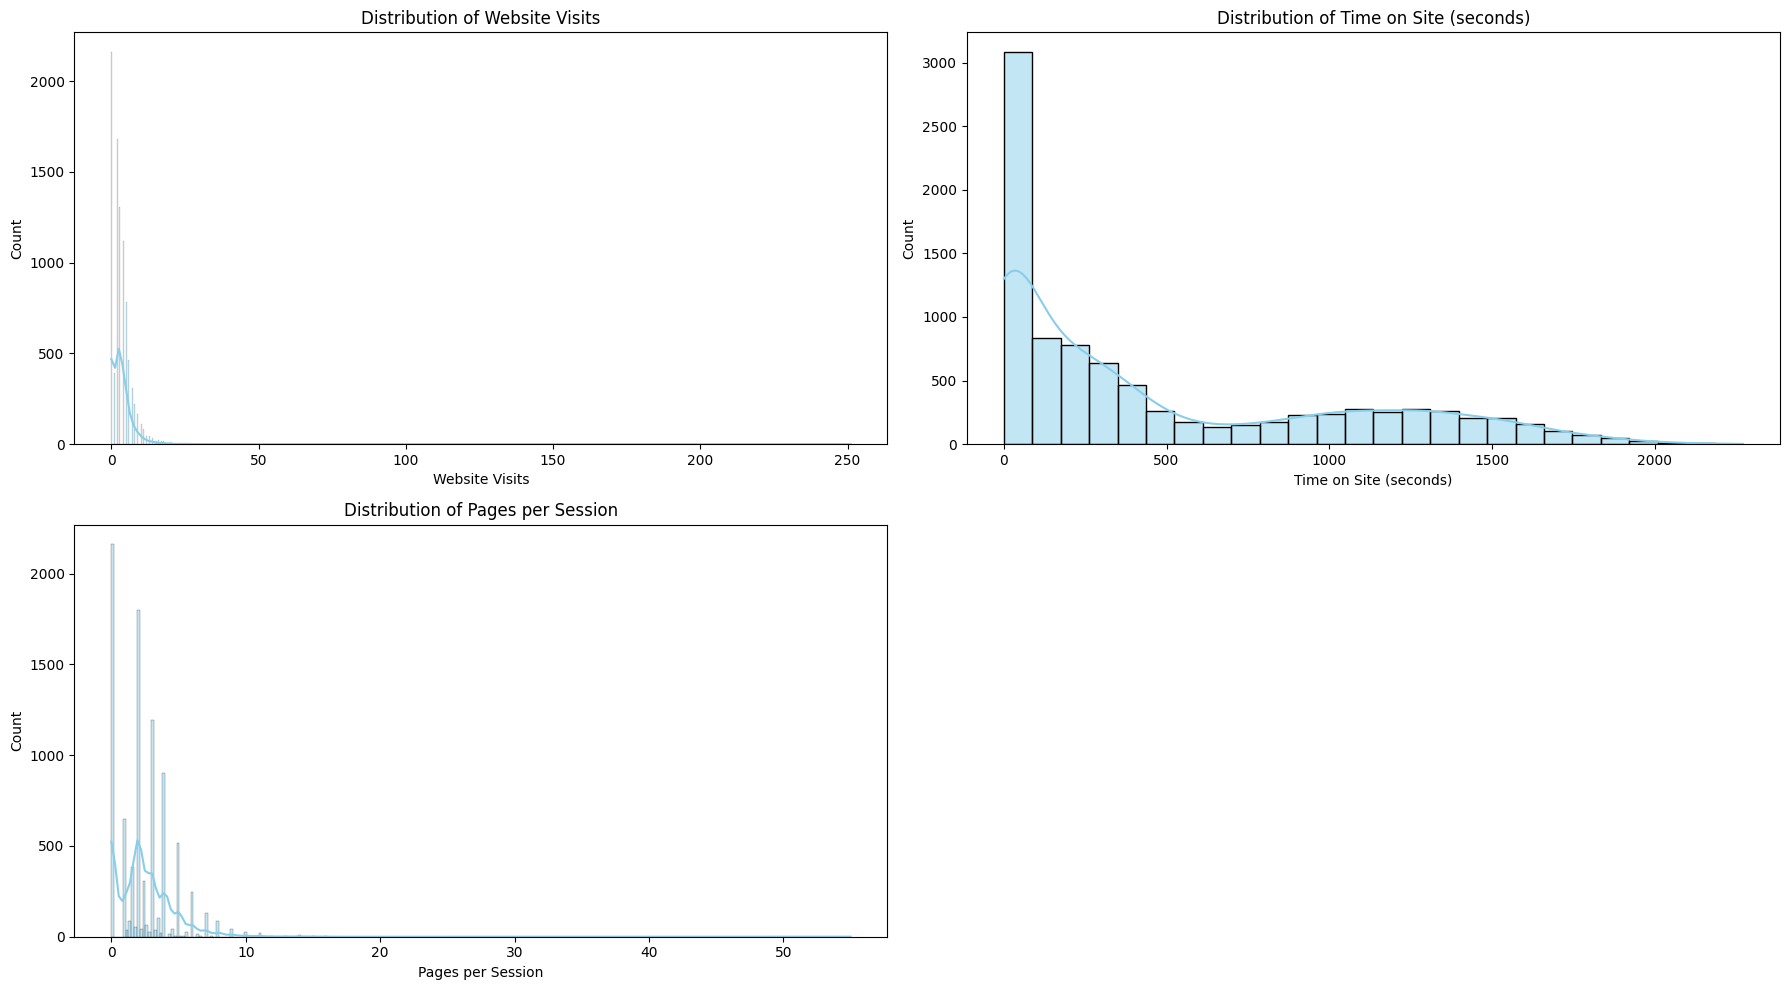

In [ ]:
numerical_features = ['Website Visits', 'Time on Site (seconds)', 'Pages per Session']

# Taille de la figure globale
plt.figure(figsize=(18, 10))

# Histogrammes pour chaque variable numérique
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=viz, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
m = joblib.load("conversion_model_intern.pkl")

# Use predict_proba to get probability estimates
print(m.predict_proba(pd.DataFrame([{
    'Traffic Entry Point': 'Landing Page',
    'Ad Source': 'Google',
    'Email Opt-Out': 0,
    'Phone Opt-Out': 1,
    'Website Visits': 3,
    'Time on Site (seconds)': 250,
    'Pages per Session': 2.4,
    'Last Engagement Type': 'Email Opened',
    'Came from Paid Ads': 1,
    'Referred by Client': 0,
    'Subscribed to Newsletter': 1,
    'Requested Business Content': 0,
    'Requested Marketing Content': 1,
    'Last Conversion Signal': 'Form Submitted'
}])))

[[0.45844695 0.54155305]]


In [ ]:
print(m.predict_proba(pd.DataFrame([{
    'Traffic Entry Point': 'Landing Page',
    'Ad Source': 'Google',
    'Email Opt-Out': 0,
    'Phone Opt-Out': 0,
    'Website Visits': 1,
    'Time on Site (seconds)': 25,
    'Pages per Session': 1,
    'Last Engagement Type': 'Email Opened',
    'Came from Paid Ads': 1,
    'Referred by Client': 0,
    'Subscribed to Newsletter': 0,
    'Requested Business Content': 0,
    'Requested Marketing Content': 0,
    'Last Conversion Signal': 'Form Submitted'
}])))


[[0.59261272 0.40738728]]


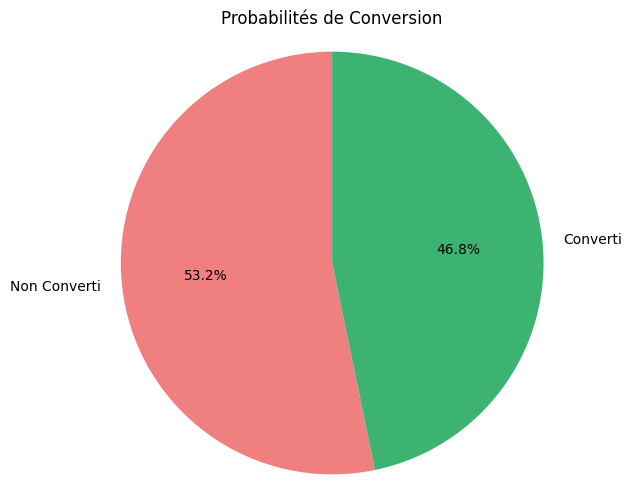

In [ ]:
import matplotlib.pyplot as plt

proba = m.predict_proba(pd.DataFrame([{
    'Traffic Entry Point': 'Landing Page',
    'Ad Source': 'Google',
    'Email Opt-Out': 0,
    'Phone Opt-Out': 1,
    'Website Visits': 3,
    'Time on Site (seconds)': 250,
    'Pages per Session': 2.4,
    'Last Engagement Type': 'Email Opened',
    'Last Conversion Signal': 'Page Visited on Website',
    'Came from Paid Ads': 1,
    'Referred by Client': 0,
    'Subscribed to Newsletter': 1,
    'Requested Business Content': 0,
    'Requested Marketing Content': 1,

}]))[0]  # [0] car predict_proba retourne [[p0, p1]]

# Labels (à adapter selon votre cas)
labels = ['Non Converti', 'Converti']

# Couleurs (facultatif)
colors = ['lightcoral', 'mediumseagreen']

# Camembert
plt.figure(figsize=(6, 6))
plt.pie(proba, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Probabilités de Conversion')
plt.axis('equal')  # Pour un cercle parfait
plt.show()


In [ ]:
df3_cleaned.head()

,Traffic Entry Point,Ad Source,Email Opt-Out,Phone Opt-Out,Website Visits,Time on Site (seconds),Pages per Session,Last Engagement Type,Came from Paid Ads,Referred by Client,Subscribed to Newsletter,Requested Business Content,Requested Marketing Content,Last Conversion Signal,Converted
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,Modified,0
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No,No,No,No,No,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,No,No,No,No,No,Email Opened,1
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No,No,No,No,No,Modified,0
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,Modified,1
